In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",False)

In [74]:
data=pd.read_csv("fraud_data.csv")

In [146]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Class: 1 for fraudulent transactions, 0 otherwise !

In [175]:
df=data.copy()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [149]:
df.isna().sum().sum()

0

In [176]:
df.duplicated().sum()

1081

In [177]:
df.drop_duplicates(inplace=True)

In [152]:
data.shape, df.shape

((284807, 31), (283726, 31))

In [153]:
(df==0).sum().sort_values(ascending=False)

Class     283253
Amount      1808
Time           2
V3             0
V4             0
V2             0
V28            0
V27            0
V26            0
V25            0
V24            0
V23            0
           ...  
V1             0
V14            0
V13            0
V12            0
V11            0
V10            0
V9             0
V8             0
V7             0
V6             0
V5             0
V15            0
Length: 31, dtype: int64

In [119]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [120]:
df.Class.value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [121]:
df[df["Class"]==0]["Amount"].describe().T

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [122]:
df[df["Class"]==1]["Amount"].describe().T

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
import scipy.stats
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import skew, norm

In [191]:
scipy.stats.skew(df.select_dtypes(np.number))

array([-0.03558046, -3.27325394, -4.69513708, -2.15197258,  0.67150062,
       -2.41406648,  1.82987071,  2.89025591, -8.31092639,  0.53766021,
        1.25296045,  0.34407237, -2.19899666,  0.06429306, -1.91879357,
       -0.30965745, -1.05115591, -3.69047768, -0.24866014,  0.10831124,
       -2.04311025,  2.8200182 , -0.18232876, -5.86718977, -0.55212632,
       -0.41574166,  0.58028925, -0.75379993, 11.55505399, 16.97871361,
       24.43041591])

In [192]:
skewed_features=pd.DataFrame({"Features":df.columns, "values":scipy.stats.skew(df.select_dtypes(np.number))})

In [193]:
skewed_features["transform"]=skewed_features["values"].apply(lambda x: True if abs(x)>0.5 else False)

In [194]:
skewed_names=skewed_features[skewed_features["transform"]==True]["Features"].values

In [81]:
def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax, facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

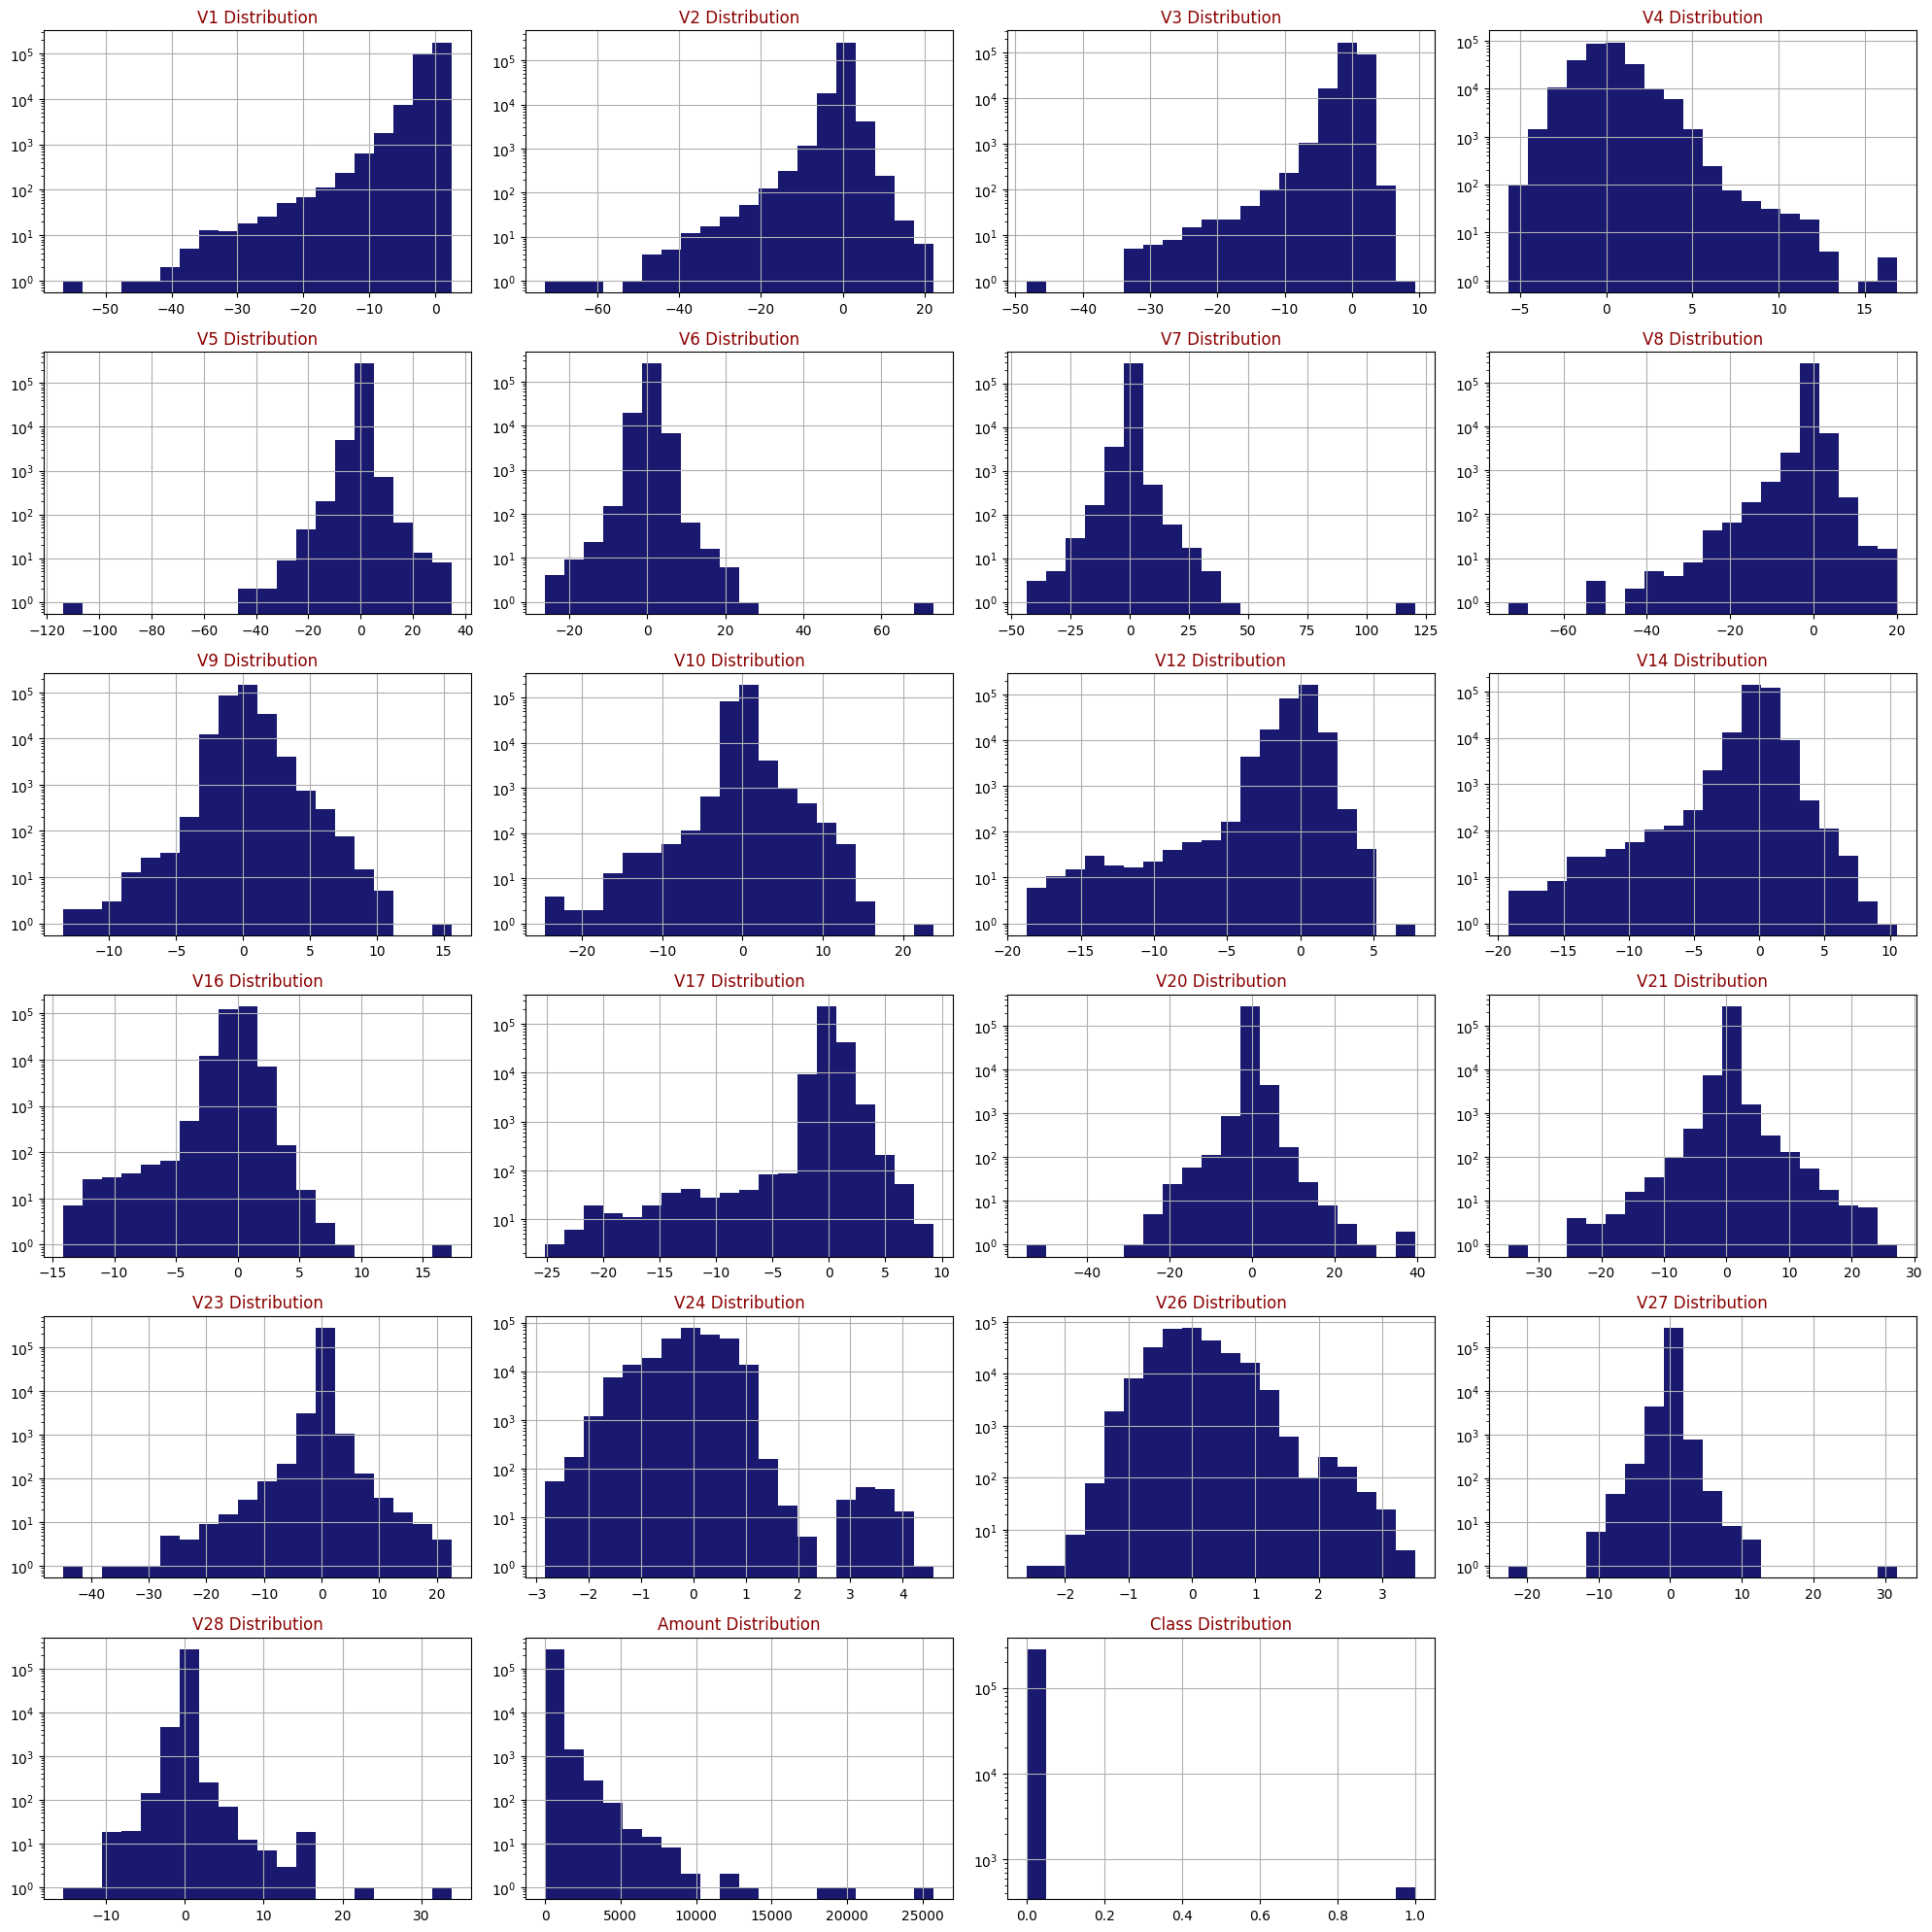

In [82]:
draw_histograms(df,skewed_names,6,4)

In [195]:
for i in skewed_names:
    if i=="Class":
        break
    df[i]=np.log1p(df[i])

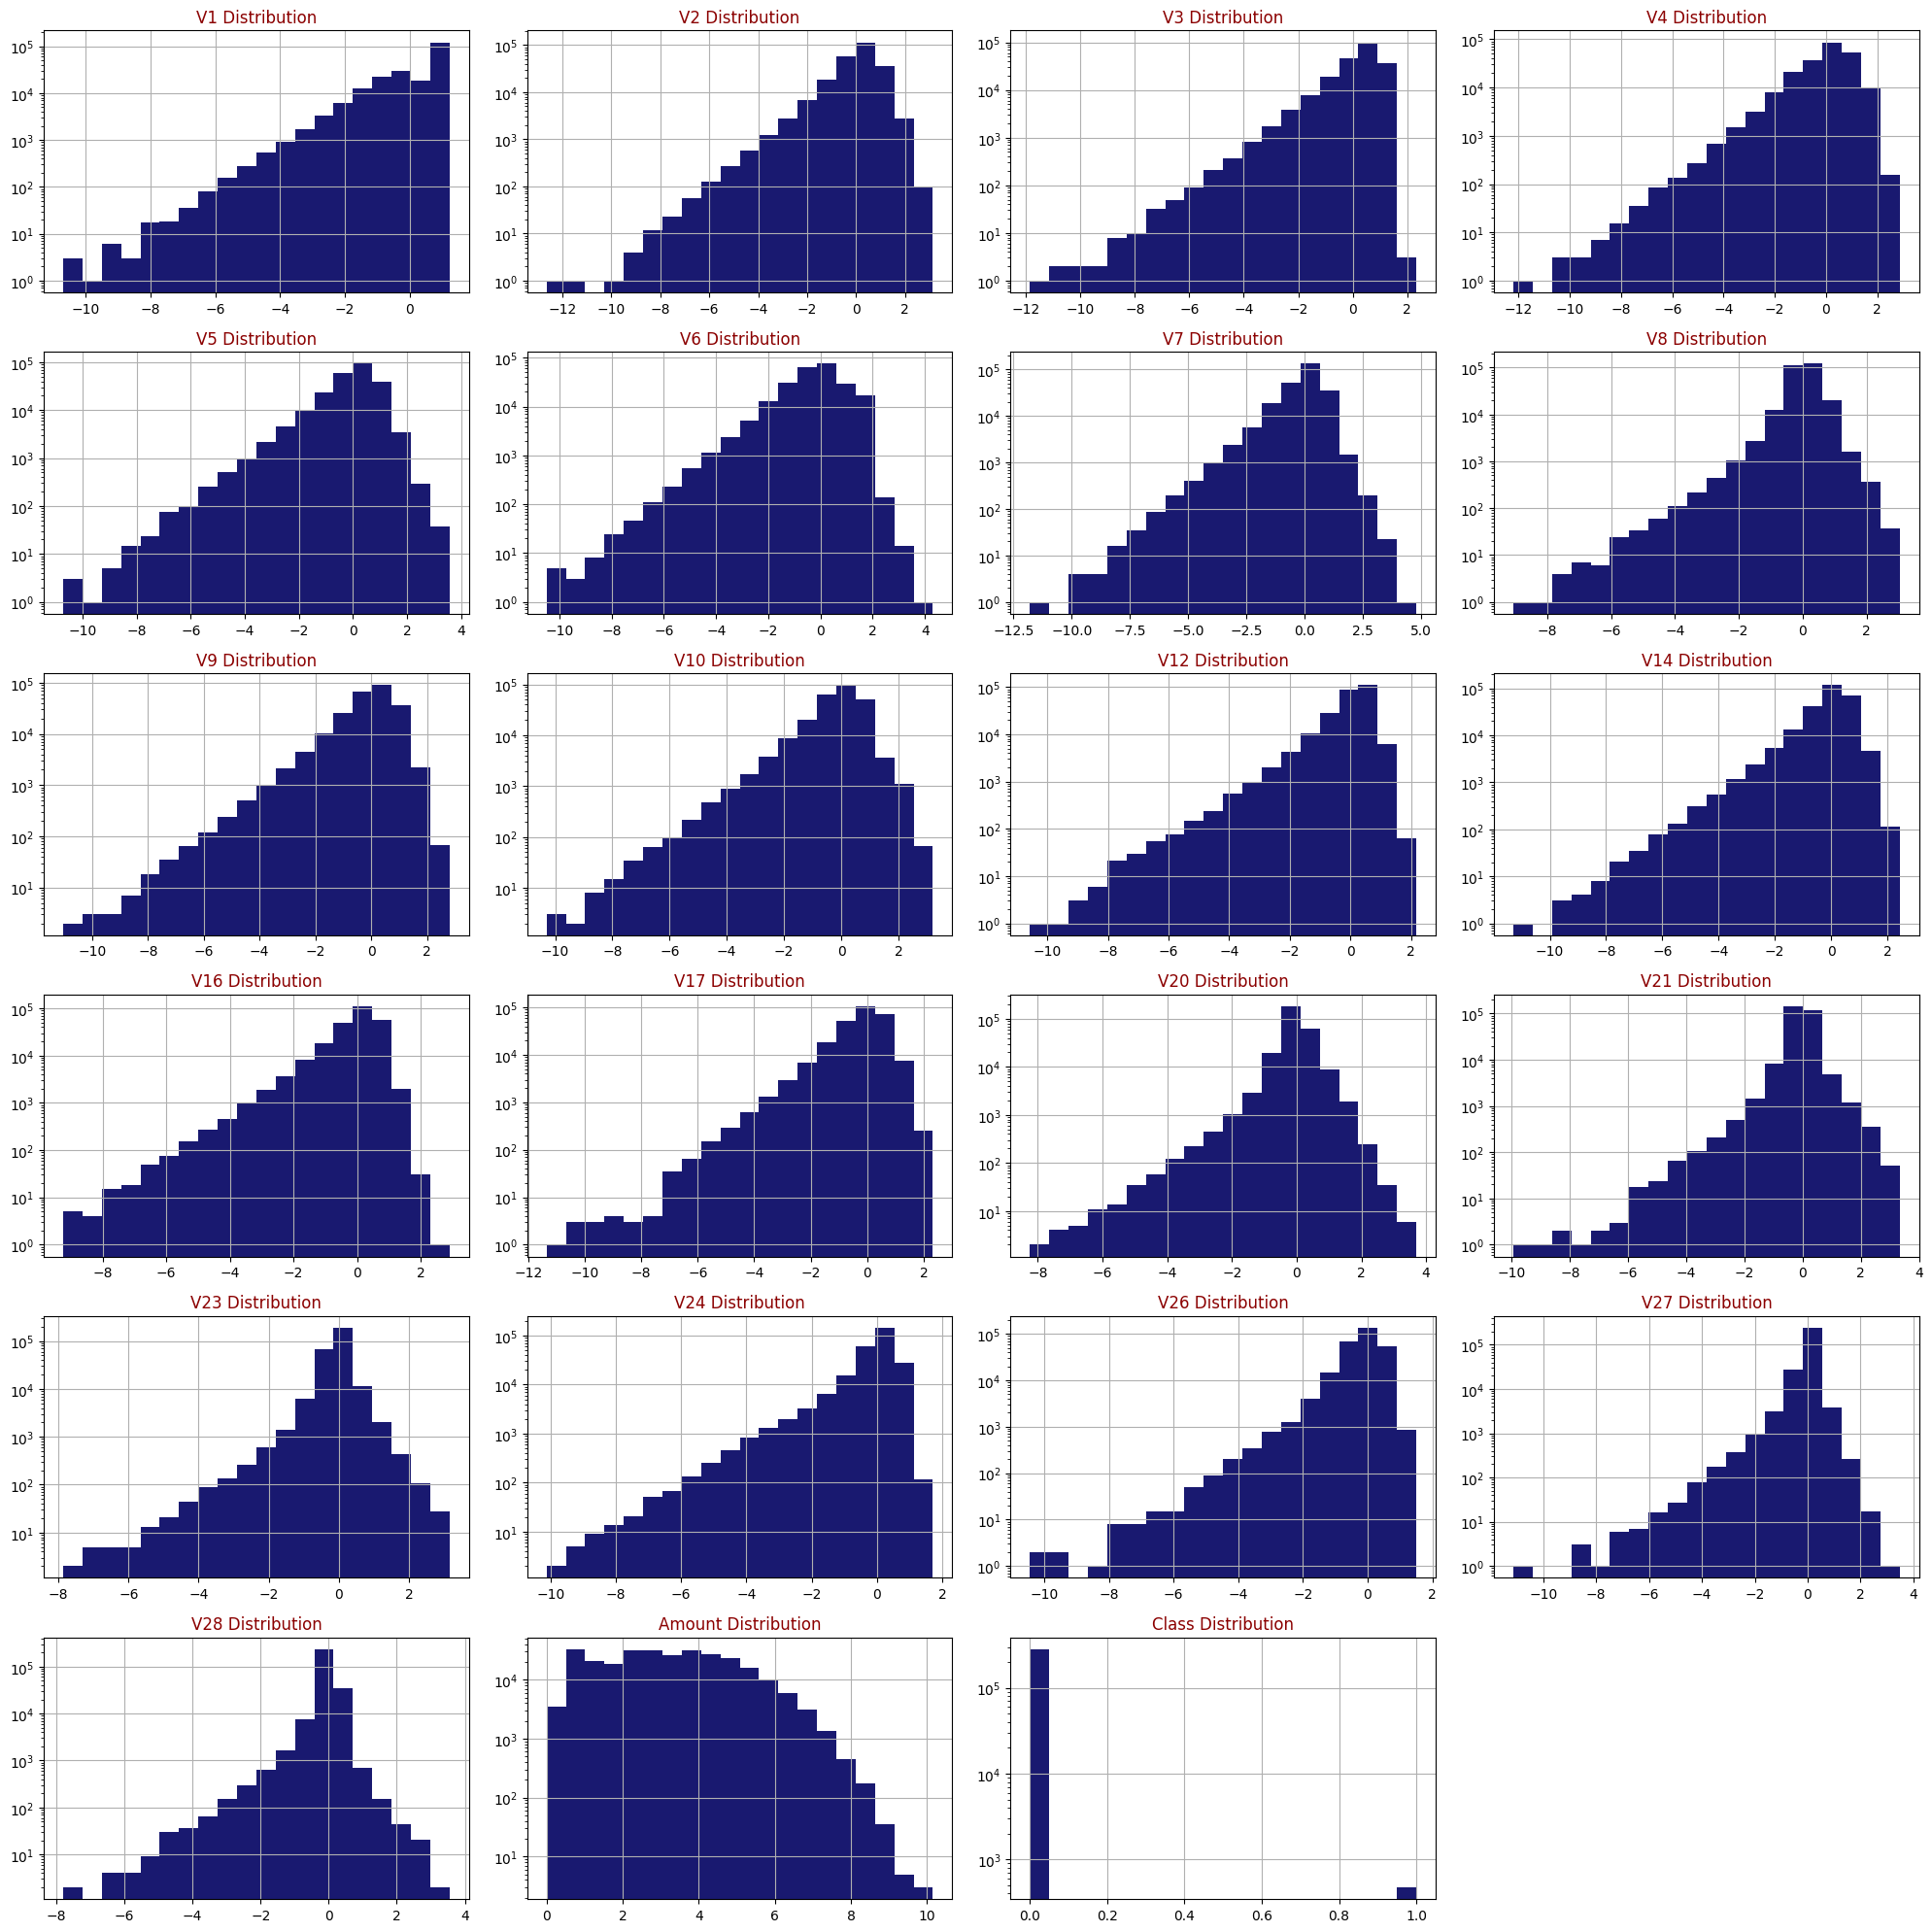

In [84]:
draw_histograms(df,skewed_names,6,4)

# Train Test Split

In [196]:
X=df.drop("Class",1)
y=df["Class"]

In [197]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, stratify=y)

In [198]:
rb=RobustScaler()
X_train_rb=rb.fit_transform(X_train)
X_test_rb=rb.transform(X_test)

In [199]:
X_train=pd.DataFrame(X_train_rb, index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(X_test_rb, index=X_test.index, columns=X_test.columns)

# Base models

In [180]:
models={
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Cat Boost": CatBoostClassifier(silent=True),
    "Gradient": GradientBoostingClassifier()
}

In [182]:
#for name, model in models.items():
#    model.fit(X_train, y_train)
#    print("---------------------------------------------------")
#    print(name+"-"+f"train score: {round(model.score(X_train,y_train),4)}")
#    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
#    y_pred=model.predict(X_test)
#    print(f"precision score: {round(precision_score(y_test, y_pred),2)}")
#    print(f"recall score: {round(recall_score(y_test, y_pred),2)}")
#    print(f"f1 score: {round(f1_score(y_test, y_pred),2)}")

---------------------------------------------------
Logistic Regression-train score: 0.9992
Logistic Regression-test score: 0.9993
precision score: 0.89
recall score: 0.68
f1 score: 0.77
---------------------------------------------------
KNN-train score: 0.9996
KNN-test score: 0.9995
precision score: 0.95
recall score: 0.77
f1 score: 0.85
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9996
precision score: 0.94
recall score: 0.8
f1 score: 0.86
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.9996
precision score: 0.94
recall score: 0.8
f1 score: 0.86
---------------------------------------------------
LightGBM-train score: 0.9972
LightGBM-test score: 0.9962
precision score: 0.24
recall score: 0.57
f1 score: 0.33
---------------------------------------------------
Decision Tree-train score: 1.0
Decision Tree-test score: 0.9992
precision score: 0.75
recall score: 0.74
f1 sco

# Random oversampling

In [248]:
concat_data=pd.concat([X_train,y_train], axis=1)

In [251]:
normal=concat_data[concat_data["Class"]==0]
fraud=concat_data[concat_data["Class"]==1]

In [252]:
len(fraud), len(normal)

(378, 226602)

In [253]:
sample=normal.sample(len(fraud))
sample_x2=normal.sample(len(fraud)*2)

In [254]:
len(fraud), len(sample), len(sample_x2)

(378, 378, 756)

## same amount of sample as fraud transactions

In [255]:
new_data=pd.concat([sample, fraud], axis=0, ignore_index=True)

In [257]:
new_data=new_data.sample(frac=1).reset_index(drop=True)

In [259]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.570348,-0.552805,-1.817761,-3.429352,2.323584,-0.621676,-1.354936,0.869933,-1.061715,-1.330093,-3.682411,1.181183,-2.912861,0.594101,-5.287455,-0.048189,-2.783073,-3.509127,-1.066175,-0.616535,8.613808,3.448764,0.080066,-4.786029,-0.309736,0.773610,-0.425160,1.306036,3.204788,18.172382,1
1,-0.299052,0.519739,-0.352840,0.461055,0.279383,-0.766616,0.248657,-0.695726,0.009240,-0.621577,0.760042,-0.104328,0.563824,1.338124,-0.418505,1.036384,-1.373187,-0.142113,0.928260,-1.875028,-0.958031,-0.598456,-0.278771,0.318190,0.021879,0.244130,-0.658733,0.606137,0.296038,0.336182,0
2,0.066480,-0.313581,0.662031,-0.031308,-0.193221,0.344971,-0.750113,0.659812,-0.397538,1.117553,-0.483047,0.052079,-2.234670,1.528390,1.592510,-0.964583,-0.165419,0.467740,-0.513491,-0.283314,-0.567410,-0.970842,-0.647594,1.127873,-0.071810,-0.719866,0.200697,-1.615963,-1.981069,-0.059652,0
3,-0.393359,0.508707,0.146379,0.197489,0.932603,-0.160711,-0.072406,0.045661,-0.147646,0.211736,-0.040786,-0.097145,0.689735,0.164970,-0.048692,-0.170254,-0.911399,0.480757,-1.132505,-0.541613,-0.372839,-0.122839,0.031028,-0.029217,0.491572,0.928117,-0.495098,0.265478,0.058666,-0.290647,0
4,0.564512,0.184370,1.282575,-2.341253,1.554512,3.556441,-2.318544,-2.522284,-5.132980,-0.180482,-2.243584,1.504566,-0.533597,-1.248952,-6.455831,-0.386062,1.627643,6.343485,3.212208,-0.616916,1.104793,-3.275823,-0.332071,-12.817666,-1.096352,-3.644159,-1.259673,2.383536,2.352281,-0.290647,1


In [260]:
X_train=new_data.drop("Class",1)
y_train=new_data["Class"]

In [265]:
models={
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Cat Boost": CatBoostClassifier(silent=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

In [266]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_train,y_train),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),2)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),2)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),2)}")

---------------------------------------------------
Logistic Regression-train score: 0.9431
Logistic Regression-test score: 0.961
precision score: 0.04
recall score: 0.97
f1 score: 0.08
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9608
precision score: 0.04
recall score: 0.96
f1 score: 0.08
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.9621
precision score: 0.04
recall score: 0.96
f1 score: 0.08
---------------------------------------------------
Cat Boost-train score: 1.0
Cat Boost-test score: 0.977
precision score: 0.06
recall score: 0.95
f1 score: 0.12
---------------------------------------------------
KNN-train score: 0.9392
KNN-test score: 0.9565
precision score: 0.03
recall score: 0.91
f1 score: 0.07
---------------------------------------------------
Decision Tree-train score: 1.0
Decision Tree-test score: 0.8942
precision score: 0.01
recall score: 0.94
f1 scor

## the threshold might be tune to increase precision score

In [330]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_train,y_train),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=(model.predict_proba(X_test)[:,1]>=0.9).astype(float)
    print(f"precision score: {round(precision_score(y_test, y_pred),4)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),4)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),4)}")

---------------------------------------------------
Logistic Regression-train score: 0.9431
Logistic Regression-test score: 0.961
precision score: 0.1166
recall score: 0.9263
f1 score: 0.2071
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.964
precision score: 0.8039
recall score: 0.8632
f1 score: 0.8325
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.9621
precision score: 0.1276
recall score: 0.9158
f1 score: 0.2239
---------------------------------------------------
Cat Boost-train score: 1.0
Cat Boost-test score: 0.977
precision score: 0.2905
recall score: 0.9053
f1 score: 0.4399
---------------------------------------------------
KNN-train score: 0.9392
KNN-test score: 0.9565
precision score: 0.1598
recall score: 0.8947
f1 score: 0.2711
---------------------------------------------------
Decision Tree-train score: 1.0
Decision Tree-test score: 0.9005
precision score: 0.

## sample_x2

## double amount of sample as fraud transactions

In [331]:
new_data2=pd.concat([sample_x2, fraud], axis=0, ignore_index=True)
new_data2=new_data2.sample(frac=1).reset_index(drop=True)

In [332]:
len(new_data2)

1134

In [333]:
X_train=new_data2.drop("Class",1)
y_train=new_data2["Class"]

In [334]:
models={
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Cat Boost": CatBoostClassifier(silent=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

In [335]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_train,y_train),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),2)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),2)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),2)}")

---------------------------------------------------
Logistic Regression-train score: 0.9577
Logistic Regression-test score: 0.9803
precision score: 0.07
recall score: 0.95
f1 score: 0.14
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9905
precision score: 0.14
recall score: 0.94
f1 score: 0.25
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.98
precision score: 0.07
recall score: 0.93
f1 score: 0.13
---------------------------------------------------
Cat Boost-train score: 1.0
Cat Boost-test score: 0.9884
precision score: 0.12
recall score: 0.94
f1 score: 0.21
---------------------------------------------------
KNN-train score: 0.9559
KNN-test score: 0.9781
precision score: 0.07
recall score: 0.91
f1 score: 0.12
---------------------------------------------------
Decision Tree-train score: 1.0
Decision Tree-test score: 0.9409
precision score: 0.03
recall score: 0.93
f1 scor

In [336]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_train,y_train),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=(model.predict_proba(X_test)[:,1]>=0.9).astype(float)
    print(f"precision score: {round(precision_score(y_test, y_pred),4)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),4)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),4)}")

---------------------------------------------------
Logistic Regression-train score: 0.9577
Logistic Regression-test score: 0.9803
precision score: 0.227
recall score: 0.8842
f1 score: 0.3613
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9902
precision score: 0.8791
recall score: 0.8421
f1 score: 0.8602
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.98
precision score: 0.2567
recall score: 0.9053
f1 score: 0.4
---------------------------------------------------
Cat Boost-train score: 1.0
Cat Boost-test score: 0.9884
precision score: 0.6131
recall score: 0.8842
f1 score: 0.7241
---------------------------------------------------
KNN-train score: 0.9559
KNN-test score: 0.9781
precision score: 0.4663
recall score: 0.8737
f1 score: 0.6081
---------------------------------------------------
Decision Tree-train score: 1.0
Decision Tree-test score: 0.9423
precision score: 0.026

#### As an evaluation, the following may be said:
#### - the recall scores are pretty high for the random sampling methods, so "true positive" rate is high. 
#### - Nevertheless precision scores are so low. It means "False Positive" rate is high too. 
#### - If false positive rate is not too important for fraud detection, this models might be useful
#### - If higher precision scores is wished, tuning the threshold may be consider
#### - precision can be increased by waiving little bit recall score with threshold tuning

# Other Undersampling Methods
* Tomek Links
* Edited Nearest Neighbours
* Neighbourhood Cleaning Rule
* Near Miss

# Modeling with Tomek links

In [31]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss

In [48]:
tl = TomekLinks(
    sampling_strategy='auto',  # remove only majority class
    n_jobs=-1)  

X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

In [49]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [50]:
X_resampled.shape, y_resampled.shape

((227825, 30), (227825,))

In [51]:
models={
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Cat Boost": CatBoostClassifier(silent=True),
    "Gradient": GradientBoostingClassifier()
}

In [15]:
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_resampled, y_resampled),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),4)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),4)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),4)}")

---------------------------------------------------
Logistic Regression-train score: 0.9992
Logistic Regression-test score: 0.9992
precision score: 0.8553
recall score: 0.6633
f1 score: 0.7471
---------------------------------------------------
KNN-train score: 0.9996
KNN-test score: 0.9996
precision score: 0.963
recall score: 0.7959
f1 score: 0.8715
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9996
precision score: 0.9524
recall score: 0.8163
f1 score: 0.8791
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.9997
precision score: 0.9759
recall score: 0.8265
f1 score: 0.895
---------------------------------------------------
LightGBM-train score: 0.9971
LightGBM-test score: 0.9963
precision score: 0.2422
recall score: 0.551
f1 score: 0.3364
---------------------------------------------------
Decision Tree-train score: 1.0
Decision Tree-test score: 0.9992
precision score: 0

# Edited Nearest Neighbours

In [17]:
enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # resamples the majority class
    n_neighbors=3, # the number of neighbours to examine to remove an observation
    kind_sel='all',  # all neighbours need to agree
    n_jobs=-1)  # I have 4 cores in my laptop

X_enn, y_enn = enn.fit_resample(X_train, y_train)

In [18]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [19]:
X_enn.shape, y_enn.shape

((227685, 30), (227685,))

In [21]:
models={
    
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    
}

In [30]:
for name, model in models.items():
    model.fit(X_enn, y_enn)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_enn, y_enn),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),4)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),4)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),4)}")

---------------------------------------------------
KNN-train score: 0.9996
KNN-test score: 0.9996
precision score: 0.9512
recall score: 0.7959
f1 score: 0.8667
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9996
precision score: 0.9195
recall score: 0.8163
f1 score: 0.8649
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.9997
precision score: 0.9438
recall score: 0.8571
f1 score: 0.8984


# Neighbourhood Cleaning Rule

In [25]:
ncr = NeighbourhoodCleaningRule(
    sampling_strategy='auto',# undersamples from all classes except minority
    n_neighbors=3, # explores 3 neighbours per observation
    kind_sel='mode', # all / most neighbouring need to disagree, only applies to cleaning step
    n_jobs=-1, # 4 processors in my laptop
    threshold_cleaning=0.1, # the threshold to evaluate a class for cleaning (used only for clearning step)
) 

X_ncr, y_ncr = ncr.fit_resample(X_train, y_train)

In [26]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [27]:
X_ncr.shape, y_ncr.shape

((227581, 30), (227581,))

In [28]:
models={
    
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    
}

In [29]:
for name, model in models.items():
    model.fit(X_ncr, y_ncr)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_ncr, y_ncr),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),4)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),4)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),4)}")

---------------------------------------------------
KNN-train score: 0.9996
KNN-test score: 0.9996
precision score: 0.9634
recall score: 0.8061
f1 score: 0.8778
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9995
precision score: 0.8913
recall score: 0.8367
f1 score: 0.8632
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.9996
precision score: 0.9432
recall score: 0.8469
f1 score: 0.8925


# NearMiss

In [32]:
nm3 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=3,
    n_neighbors=3,
    n_jobs=-1)  # I have 4 cores in my laptop

X_nm3, y_nm3 = nm3.fit_resample(X_train, y_train)

In [33]:
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [34]:
X_nm3.shape, y_nm3.shape

((779, 30), (779,))

In [35]:
models={
    
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    
}

In [36]:
for name, model in models.items():
    model.fit(X_nm3, y_nm3)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_nm3, y_nm3),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),4)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),4)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),4)}")

---------------------------------------------------
KNN-train score: 0.8575
KNN-test score: 0.9959
precision score: 0.2746
recall score: 0.8265
f1 score: 0.4122
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9976
precision score: 0.4029
recall score: 0.8469
f1 score: 0.5461
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.9337
precision score: 0.0216
recall score: 0.8469
f1 score: 0.0421


In [37]:
nm1 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=1,
    n_neighbors=3,
    n_jobs=-1)  # I have 4 cores in my laptop

X_nm1, y_nm1 = nm1.fit_resample(X_train, y_train)

In [38]:
for name, model in models.items():
    model.fit(X_nm1, y_nm1)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_nm1, y_nm1),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),4)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),4)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),4)}")

---------------------------------------------------
KNN-train score: 0.9619
KNN-test score: 0.8125
precision score: 0.0085
recall score: 0.9388
f1 score: 0.0169
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.0947
precision score: 0.0018
recall score: 0.9694
f1 score: 0.0037
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.1851
precision score: 0.0021
recall score: 0.9796
f1 score: 0.0041


In [39]:
nm2 = NearMiss(
    sampling_strategy='auto',  # undersamples only the majority class
    version=2,
    n_neighbors=3,
    n_jobs=-1)  # I have 4 cores in my laptop

X_nm2, y_nm2 = nm2.fit_resample(X_train, y_train)

In [40]:
for name, model in models.items():
    model.fit(X_nm2, y_nm2)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_nm2, y_nm2),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),4)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),4)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),4)}")

---------------------------------------------------
KNN-train score: 0.9962
KNN-test score: 0.0086
precision score: 0.0017
recall score: 0.9898
f1 score: 0.0034
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.0089
precision score: 0.0017
recall score: 1.0
f1 score: 0.0035
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.0066
precision score: 0.0017
recall score: 1.0
f1 score: 0.0035


# Under sampling method comparison

In [79]:
rf=RandomForestClassifier()
rf.fit(X_resampled, y_resampled)
y_pred=rf.predict_proba(X_test)[:,1]
tomek_score=roc_auc_score(y_test, y_pred)

In [80]:
rf=RandomForestClassifier()
rf.fit(X_enn, y_enn)
y_pred=rf.predict_proba(X_test)[:,1]
Edited_Nearest_score=roc_auc_score(y_test, y_pred)

In [81]:
rf=RandomForestClassifier()
rf.fit(X_ncr, y_ncr)
y_pred=rf.predict_proba(X_test)[:,1]
Neighbourhood_Cleaning_score=roc_auc_score(y_test, y_pred)

In [82]:
rf=RandomForestClassifier()
rf.fit(X_nm3, y_nm3)
y_pred=rf.predict_proba(X_test)[:,1]
NearMiss_score=roc_auc_score(y_test, y_pred)

In [127]:
comparison_table=pd.DataFrame({"roc score":[tomek_score, Edited_Nearest_score, Neighbourhood_Cleaning_score, NearMiss_score]},
            index=["Tomek Link","Edited Nearest ","Neighbourhood Cleaning","NearMiss"])

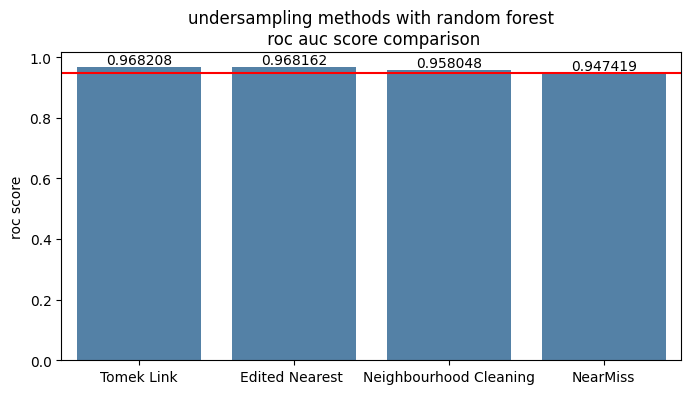

In [129]:
plt.figure(figsize=(8,4))
ax=sns.barplot(comparison_table, x=comparison_table.index, y=comparison_table["roc score"], color="steelblue")
plt.axhline(comparison_table["roc score"]['NearMiss'], color='r')
plt.ylabel("roc score")
plt.title("undersampling methods with random forest\n roc auc score comparison")
ax.bar_label(ax.containers[0])
plt.show()

# Feature Importance

### skewed features data was used on this random forest modeling

In [200]:
# some features has null values because of log transformation

for i in X_train.columns:
    X_train[i]=X_train[i].fillna(X_train[i].mean())
for i in X_test.columns:
    X_test[i]=X_test[i].fillna(X_test[i].mean())

In [119]:
from imblearn.under_sampling import RandomUnderSampler

In [201]:
random=RandomUnderSampler(sampling_strategy=0.5, replacement=False)
X_rand, y_rand= random.fit_resample(X_train, y_train)

In [210]:
X_train.shape, X_rand.shape, y_train.value_counts()[1]

((226980, 30), (1134, 30), 378)

In [211]:
rf=RandomForestClassifier()
rf.fit(X_rand, y_rand)
y_pred=rf.predict(X_test)
y_prob=rf.predict_proba(X_test)[:,1]

In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.21      0.87      0.34        95

    accuracy                           0.99     56746
   macro avg       0.61      0.93      0.67     56746
weighted avg       1.00      0.99      1.00     56746



In [213]:
confusion_matrix(y_test, y_pred)

array([[56341,   310],
       [   12,    83]], dtype=int64)

### tuning threshold to better precision and f1 score

In [214]:
y_prob2=(rf.predict_proba(X_test)[:,1]>=0.9).astype(float)

In [215]:
print(classification_report(y_test, y_prob2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.63      0.73        95

    accuracy                           1.00     56746
   macro avg       0.93      0.82      0.86     56746
weighted avg       1.00      1.00      1.00     56746



In [216]:
confusion_matrix(y_test, y_prob2)

array([[56641,    10],
       [   35,    60]], dtype=int64)

In [233]:
y_prob3=(rf.predict_proba(X_test)[:,1]>=0.8).astype(float)
print(classification_report(y_test, y_prob3))
confusion_matrix(y_test, y_prob3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.82      0.83        95

    accuracy                           1.00     56746
   macro avg       0.92      0.91      0.92     56746
weighted avg       1.00      1.00      1.00     56746



array([[56637,    14],
       [   17,    78]], dtype=int64)

### 0.8 as threshold might be better choice due to higher true positive rate and not to much negative effect to false positive rate

In [235]:
rf.feature_importances_

array([0.00726295, 0.01035793, 0.06493665, 0.03217373, 0.20195915,
       0.00757625, 0.01129092, 0.01385742, 0.01223496, 0.01135783,
       0.04073464, 0.15761538, 0.04626389, 0.00724804, 0.05514334,
       0.00905323, 0.01468141, 0.02742485, 0.08164625, 0.01597471,
       0.01179579, 0.05202358, 0.00735843, 0.00708715, 0.00870436,
       0.00540149, 0.00747782, 0.03256303, 0.02293445, 0.01586038])

In [236]:
tablo=pd.DataFrame({"coef":rf.feature_importances_}, index=X.columns)

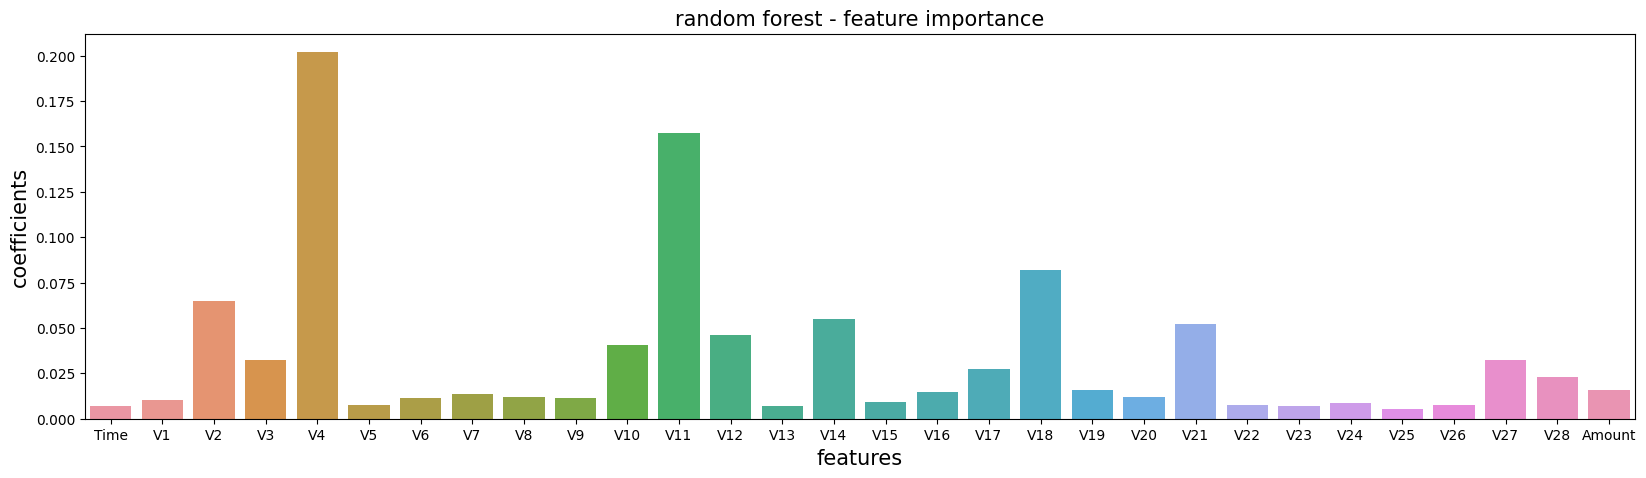

In [237]:
plt.figure(figsize=(20,5))
sns.barplot(tablo, x=tablo.index, y="coef")
plt.title("random forest - feature importance", fontsize=15)
plt.ylabel("coefficients", fontsize=15)
plt.xlabel("features", fontsize=15)
plt.show()

In [238]:
roc_auc_score(y_test, y_pred), roc_auc_score(y_test, y_prob2), roc_auc_score(y_test, y_prob3)

(0.9341060547080045, 0.815701213988883, 0.9104027522160151)

In [239]:
precision_score(y_test, y_pred), precision_score(y_test, y_prob2), precision_score(y_test, y_prob3)

(0.21119592875318066, 0.8571428571428571, 0.8478260869565217)

# Modeling with less number of features

In [240]:
tablo 

,coef
Time,0.007263
V1,0.010358
V2,0.064937
V3,0.032174
V4,0.201959
V5,0.007576
V6,0.011291
V7,0.013857
V8,0.012235
V9,0.011358


In [244]:
tablo[tablo["coef"]>0.025].index.values

array(['V2', 'V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V17', 'V18', 'V21',
       'V27'], dtype=object)

### After feature importance, features with a value greater than 0.025 are selected 

In [255]:
df_imp=df[['V2', 'V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V17', 'V18', 'V21',
       'V27',"Class"]]

In [256]:
df_imp

,V2,V3,V4,V10,V11,V12,V14,V17,V18,V21,V27,Class
0,-0.075566,1.263094,0.866325,0.086906,-0.551600,-0.961813,-0.372760,0.188942,0.025791,-0.018476,0.125362,0
1,0.235981,0.153991,0.370290,-0.182691,1.612727,0.725244,-0.155219,-0.121947,-0.183361,-0.255893,-0.009024,0
2,NaN,1.020005,0.321924,0.188670,0.624501,0.063992,-0.181457,0.746673,-0.121359,0.221541,-0.056944,0
3,-0.204845,1.027114,-1.989903,-0.056519,-0.226487,0.164012,-0.339570,-1.152307,1.965775,-0.114626,0.060834,0
4,0.630067,0.935590,0.338637,0.561371,-0.822843,0.430610,NaN,-0.270541,-0.038195,-0.009475,0.198377,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.404400,NaN,NaN,1.678249,-1.593105,1.311555,1.727566,1.095839,0.510632,0.193471,0.664568,0
284803,-0.056656,1.110221,-1.341660,-3.726625,-0.150189,0.650136,-1.124370,-0.026029,-1.221179,0.194090,0.066230,0
284804,-0.358468,NaN,-0.816057,-0.663165,0.411614,0.061207,-0.714579,0.272697,0.395652,0.208675,0.004445,0
284805,0.425583,0.532104,0.524610,-0.509369,-1.933849,-3.293765,0.371305,0.412062,1.113981,0.235266,0.103297,0


In [257]:
X=df_imp.drop("Class",1)
y=df_imp["Class"]

In [258]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, stratify=y)

In [261]:
for i in X_train.columns:
    X_train[i]=X_train[i].fillna(X_train[i].mean())
for i in X_test.columns:
    X_test[i]=X_test[i].fillna(X_test[i].mean())

### undersample modeling with new data with less features

In [262]:
random=RandomUnderSampler(sampling_strategy=0.5, replacement=False)
X_rand, y_rand= random.fit_resample(X_train, y_train)

In [263]:
rf=RandomForestClassifier()
rf.fit(X_rand, y_rand)
y_pred=rf.predict(X_test)

In [264]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.14      0.81      0.23        95

    accuracy                           0.99     56746
   macro avg       0.57      0.90      0.61     56746
weighted avg       1.00      0.99      0.99     56746



In [265]:
confusion_matrix(y_test, y_pred)

array([[56162,   489],
       [   18,    77]], dtype=int64)

In [270]:
y_prob=(rf.predict_proba(X_test)[:,1]>=0.8).astype(float)
print(classification_report(y_test, y_prob))
confusion_matrix(y_test, y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.50      0.77      0.61        95

    accuracy                           1.00     56746
   macro avg       0.75      0.88      0.80     56746
weighted avg       1.00      1.00      1.00     56746



array([[56579,    72],
       [   22,    73]], dtype=int64)

## As a result, we had very close true positive rate to previous model on new less features model but higher false positive and higher false negative rates.